In [1]:
%load_ext autoreload


%autoreload 2

In [2]:
from pathlib import Path
import pandas as pd
pd.set_option('display.max_columns', None)
from utils.mlss import ivpack, aer, r_base, fixest
from utils.mlss import (
    train_lgb,
    train_random_forest,
    linear_prediction,
    quadratic_prediction,
    construct_instrument,
    cross_fit_instruments,
    split_sample_ml,
    anderson_rubin,
    feols,
    hyperparameter_search,
    linear_prediction,
    quadratic_prediction,
    quadratic_prediction_with_interaction,
    parse_ar
)

import seaborn as sns
import matplotlib.pyplot as plt
import re
import statsmodels.api as sm

C:\WBG\anaconda\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\WBG\anaconda\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\WBG\anaconda\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
Unable to determine R home: [WinError 2] The system cannot find the file specified
Unable to determine R library path: Command 

In [3]:
#df_cases = pd.read_stata("C:\\Users\\wb570559\\india_project\\monthly_mortality\\data\\tempdata_yearly_juris_pol.dta")

In [4]:
#df_cases_all = pd.DataFrame()

In [5]:
import glob
import os
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wb570559\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wb570559\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
# data prep -
# 1. yearly pollution

def cleaner(txt_file):
    
    text = txt_file
    text = re.sub(r"(&[a-zA-Z]*;)", " ", text)  # the txt files had some unwanted text like &rsquo; this line removes such text
    text = text.lower()
    
    # remove punctuation and numbers from the string
    punctuations = '''!()[]{};:'"\,<>./?@#$%^&*_~=+`|0123456789 '''  # removing punctuations except hyphens
    
    for x in text.lower(): 
        if x in punctuations: 
            text = text.replace(x, "")
            
    
    text = text.replace(" st ", " ")
    text = text.replace(" nd ", " ")
    text = text.replace(" rd ", " ")
    text = text.replace(" th ", " ")
    text = text.replace("hellip", " ")
    text = text.replace("rsquo", " ")
    text = text.replace("ldquo", " ")
    text = text.replace("rdquo", " ")
    text = text.replace("ndash", " ")
    text = text.replace("--", " ")

    
    return text



def cleaner2(txt_file):
    
    text = txt_file
    text = re.sub(r"(&[a-zA-Z]*;)", " ", text)  # the txt files had some unwanted text like &rsquo; this line removes such text
    text = text.lower()
    
    # remove punctuation and numbers from the string
    punctuations = '''!()[]{};:'"\,<>./?@#$%^&*_~=+`| '''  # removing punctuations except hyphens
    
    for x in text.lower(): 
        if x in punctuations: 
            text = text.replace(x, "")
            
    
    text = text.replace(" st ", " ")
    text = text.replace(" nd ", " ")
    text = text.replace(" rd ", " ")
    text = text.replace(" th ", " ")
    text = text.replace("hellip", " ")
    text = text.replace("rsquo", " ")
    text = text.replace("ldquo", " ")
    text = text.replace("rdquo", " ")
    text = text.replace("ndash", " ")
    text = text.replace("--", " ")

    
    return text

In [7]:
#1. yearly pollution

In [8]:
df_yp = pd.read_stata(r"C:\Users\wb570559\mlss_replication\air_pollution\data\tempdata\tempdata_yearly_air_patrick.csv")

In [9]:
df_yp.head()

,year,district,EnvCase,NotGreenCaseMedian,GreenCaseMedian,NotGreenCaseMean,GreenCaseMean,mean_pm25,NumJudges,JudgeWoman,JudgeGrad,JudgePostGrad,GovtPetitioner,GovtRespondent,Appeal,Constitutional,lsa_vec1,lsa_vec2,lsa_vec3,lsa_vec4,lsa_vec5,lsa_vec6,lsa_vec7,lsa_vec8,lsa_vec9,lsa_vec10,lsa_vec11,lsa_vec12,lsa_vec13,lsa_vec14,lsa_vec15,lsa_vec16,lsa_vec17,lsa_vec18,lsa_vec19,lsa_vec20,lsa_vec21,lsa_vec22,lsa_vec23,lsa_vec24,lsa_vec25,Onelsa_vec1,Onelsa_vec2,Onelsa_vec3,Onelsa_vec4,Onelsa_vec5,Onelsa_vec6,Onelsa_vec7,Onelsa_vec8,Onelsa_vec9,Onelsa_vec10,Onelsa_vec11,Onelsa_vec12,Onelsa_vec13,Onelsa_vec14,Onelsa_vec15,Onelsa_vec16,Onelsa_vec17,Onelsa_vec18,Onelsa_vec19,Onelsa_vec20,Onelsa_vec21,Onelsa_vec22,Onelsa_vec23,Onelsa_vec24,Onelsa_vec25,d2v_vec1,d2v_vec2,d2v_vec3,d2v_vec4,d2v_vec5,d2v_vec6,d2v_vec7,d2v_vec8,d2v_vec9,d2v_vec10,d2v_vec11,d2v_vec12,d2v_vec13,d2v_vec14,d2v_vec15,d2v_vec16,d2v_vec17,d2v_vec18,d2v_vec19,d2v_vec20,d2v_vec21,d2v_vec22,d2v_vec23,d2v_vec24,d2v_vec25,jidentity_aadesai,jidentity_aanand,jidentity_abhan,jidentity_abhate,jidentity_abhushan,jidentity_acrao,jidentity_adjain,jidentity_adsingh,jidentity_afarooq,jidentity_ahariprasad,jidentity_akagrawal,jidentity_akganguly,jidentity_akjayasankarannambiar,jidentity_akparichha,jidentity_akpatnaik,jidentity_akrath,jidentity_aksikri,jidentity_aksingh,jidentity_akhanwilkarasikridmisr,jidentity_akulasekaran,jidentity_alakshmanan,jidentity_ambasheerahamed,jidentity_amkhanwilkar,jidentity_amshaffique,jidentity_amuhamedmustaque,jidentity_apdeshpande,jidentity_apsahi,jidentity_apasayat,jidentity_aryousufbssajwanrctriv,jidentity_araman,jidentity_asanand,jidentity_asbopanna,jidentity_aschandurkar,jidentity_asgadkari,jidentity_asnaidu,jidentity_asoka,jidentity_ashah,jidentity_asikri,jidentity_avramakrishnapillai,jidentity_avseshasai,jidentity_avsrinivasareddy,jidentity_aakankshavyas,jidentity_abdulquddhose,jidentity_abhays,jidentity_abhaysoka,jidentity_achintyamallabujorbaru,jidentity_adityakumartrivedi,jidentity_aftabalam,jidentity_ahsanuddinamanullah,jidentity_ajayadeshpande,jidentity_ajaybhanot,jidentity_ajaydeshpande,jidentity_ajaykumarmittal,jidentity_ajaymohangoel,jidentity_ajayrastogi,jidentity_ajitkumarj,jidentity_ajitprakashshah,jidentity_ajitsingh,jidentity_akhileshchandra,jidentity_akilkureshi,jidentity_alexanderthomas,jidentity_alokkumarverma,jidentity_alokmathur,jidentity_aloksharma,jidentity_aloksingh,jidentity_alokverma,jidentity_altamaskabir,jidentity_amitrawal,jidentity_amitavkgupta,jidentity_amitavaroy,jidentity_anandbyrareddy,jidentity_anandasen,jidentity_anantbijaysingh,jidentity_anantsdave,jidentity_anildevsingh,jidentity_anilknarendran,jidentity_anilkumarchoudhary,jidentity_anilkumarsinha,jidentity_anilkumarupadhyay,jidentity_anjalipalo,jidentity_anjanamishra,jidentity_anjanaprakash,jidentity_anjulipalo,jidentity_ankitsingla,jidentity_annapurnadixit,jidentity_anojain,jidentity_anoopchitkara,jidentity_antonydominic,jidentity_anusivaraman,jidentity_anubharawatchoudhary,jidentity_anujaprabhudessai,jidentity_anupindersinghgrewal,jidentity_apareshkumarsingh,jidentity_arramalingam,jidentity_aravindkumar,jidentity_arijitpasayat,jidentity_arunkumar,jidentity_arunmishra,jidentity_arunmonga,jidentity_arunpalli,jidentity_aruntandon,jidentity_arvindsrivastava,jidentity_ashiskumarchakraborty,jidentity_ashokbhinchigeri,jidentity_ashokbhan,jidentity_ashokbhushan,jidentity_ashokgnijagannavar,jidentity_ashokjindal,jidentity_ashokskinagi,jidentity_ashutoshkumar,jidentity_ashutoshmohunta,jidentity_ashwanikumarsingh,jidentity_atulsreedharan,jidentity_augustinegeorgemasih,jidentity_avneeshjhingan,jidentity_bakhadiri,jidentity_bcpatel,jidentity_bchauhan,jidentity_bknayak,jidentity_bkpatel,jidentity_bkroy,jidentity_bksharma,jidentity_bkirpal,jidentity_bmkothari,jidentity_bmanohar,jidentity_bnagrawal,jidentity_bnmahapatra,jidentity_bnazki,jidentity_bpcolabawalla,jidentity_bpdharmadhikari,jidentity_bproutray,jidentity_brgavai,jidentity_brsarangi,jidentity_bravichandran,jid

In [10]:
df_yp = df_yp[df_yp["year"].notnull()]

df_yp["districtXyear"] = df_yp["district"].astype(str) + "_" + df_yp["year"].astype(str) 
df_yp["year_"] = df_yp["year"].apply(lambda x : "year"+str(cleaner2(str(x))))

df_yp["district"] = df_yp["district"].apply(lambda x : str(cleaner(x)))

district_dummies = pd.get_dummies(df_yp["district"],drop_first=True)
year_dummies = pd.get_dummies(df_yp["year_"],drop_first=True)

year_cols = list(year_dummies.columns)
district_cols = list(district_dummies.columns)

df_yp = pd.concat([df_yp,year_dummies,district_dummies], axis=1)



In [11]:
characteristic_cols_main = ["JudgeWoman", "JudgePostGrad"]

In [12]:
d2v_list = ["d2v_vec1","d2v_vec2","d2v_vec3","d2v_vec4","d2v_vec5",
           "d2v_vec6","d2v_vec7","d2v_vec8","d2v_vec9","d2v_vec10",
           "d2v_vec11","d2v_vec12","d2v_vec13","d2v_vec14","d2v_vec15",
           "d2v_vec16","d2v_vec17","d2v_vec18","d2v_vec19","d2v_vec20",
           "d2v_vec21","d2v_vec22","d2v_vec23","d2v_vec24","d2v_vec25"]

In [13]:
lsa_list = ["lsa_vec1","lsa_vec2","lsa_vec3","lsa_vec4","lsa_vec5",
           "lsa_vec6","lsa_vec7","lsa_vec8","lsa_vec9","lsa_vec10",
           "lsa_vec11","lsa_vec12","lsa_vec13","lsa_vec14","lsa_vec15",
           "lsa_vec16","lsa_vec17","lsa_vec18","lsa_vec19","lsa_vec20",
           "lsa_vec21","lsa_vec22","lsa_vec23","lsa_vec24","lsa_vec25"]

In [14]:
pollution_vars = [
                  "mean_pm25"
                 ]

In [15]:
#vectype = ["d2v", "lsa"]
vectype = ["d2v"]

In [16]:
covs_no_dum = ["GovtRespondent","Appeal","Constitutional", "CaseDummy"] 
covs_orig = covs_no_dum+year_cols+district_cols

In [17]:
#df_yp_ji = pd.read_stata(r"C:\Users\wb570559\mlss_replication\processed_data\tempdata_yearly_juris_pol_judge_identity.dta")

In [18]:
#all_cols = list(df_yp.columns)

In [19]:
#judge_identity_vars = [ele for ele in all_cols if "jidentity" in ele]

In [20]:
#judge_identity_vars[:5]

In [21]:
#global fwl

def fit_mlss_rf(seed, covs=None):
    rng = np.random.RandomState(seed)
    sample = (rng.rand(len(df)) > 0.5).astype(int)

    state = np.random.get_state()
    np.random.seed(seed)
    data, fwl_data = split_sample_ml(
        df,
        sample,
        characteristic_cols,
        "FracGreenCases",
        outcomevar,
        covariates=covs,
        training=train_random_forest,
        name="rf",
        tune=False,
        clf=searched_clf,
    )
    #fwl = fwl_data
    np.random.set_state(state)

    if covs is not None:
        fwl_data.index = data.index
        #print("abc")
        return analyze(fwl_data, df, sample, "rf")
    else:
        #print("pqr")
        return analyze(data, df, sample, "rf")

def analyze(data, df, sample, name):
    s0 = df.loc[sample == 0].index
    s1 = df.loc[sample == 1].index
    if "y" in data.columns:
        coef, fit = feols(f"y ~ 1 | d ~ z", data=data,)
        return {
            "coef": coef,
            "fit": fit,
            "ar1": anderson_rubin(data.loc[s0], "y ~ d", "~z",)[0],
            "ar2": anderson_rubin(data.loc[s1], "y ~ d", "~z",)[0],
        }
    else:
        coef, fit = feols(f"{outcomevar} ~ 1 | FracGreenCases ~ {name}_inst", data=data,)
        return {
            "coef": coef,
            "fit": fit,
            "ar1": anderson_rubin(
                data.loc[s0], f"{outcomevar} ~ FracGreenCases", f"~{name}_inst",
            )[0],
            "ar2": anderson_rubin(
                data.loc[s1], f"{outcomevar} ~ FracGreenCases", f"~{name}_inst",
            )[0],
            "r2": data[["FracGreenCases", f"{name}_inst"]].corr().iloc[0, 1] ** 2,
        }
  

def fit_mlss(seed, trainer, covs=None):
    rng = np.random.RandomState(seed)
    sample = (rng.rand(len(df)) > 0.5).astype(int)

    data, fwl_data = split_sample_ml(
        df,
        sample,
        characteristic_cols,
        "FracGreenCases",
        outcomevar,
        covariates=covs,
        training=trainer,
        name="lgb",
        tune=False,
    )

    if covs is not None:
        fwl_data.index = data.index
        fwl_data.to_csv("fwl.csv")
        return analyze(fwl_data, df, sample, "lgb")
    else:
        return analyze(data, df, sample, "lgb")

plot_kwargs = dict(ls="", capthick=1, capsize=4,)


def plot_result(res, y, ax=None):
    coef, wald_se = pd.DataFrame(res["coef"]).iloc[1, :2]

    numbers, shape = parse_ar(res["ar1"])
    #if shape == "interval":
    lb, ub = numbers
        
    numbers, shape = parse_ar(res["ar2"])
    #if shape == "interval":
    lb = max(lb, numbers[0])
    ub = min(ub, numbers[1])
        
    lb = max(lb, -1000)
    ub = min(ub, 1000)

    (plt if ax is None else ax).errorbar(
        y=y, x=coef, xerr=1.96 * wald_se, marker=".", **plot_kwargs, color="b"
    )
    (plt if ax is None else ax).errorbar(
        y=y + 0.1,
        x=coef,
        xerr=np.array([[coef - lb], [ub - coef]]),
        **plot_kwargs,
        color="r",
    )

    if "r2" in res:
        (plt if ax is None else ax).text(
            y=y + 0.2, x=1, s=f'{100*res["r2"]:.1f}%', fontsize="small"
        )

def fit_and_plot(seed, ax, precompute=None, **kwargs):
    if precompute is not None:
        [lgb_res, rf_res, linear_res, quad_res, quad_inter_res] = precompute
    else:
        lgb_res = fit_mlss(seed, trainer=train_lgb, **kwargs)
        #lgb_res = pd.DataFrame(lgb_res)
        rf_res = fit_mlss_rf(seed, **kwargs)
        #rf_res = pd.DataFrame(rf_res)
        linear_res = fit_mlss(seed, trainer=linear_prediction, **kwargs)
        #linear_res = pd.DataFrame(linear_res)
        quad_res = fit_mlss(seed, trainer=quadratic_prediction, **kwargs)
        #quad_res = pd.DataFrame(quad_res)
        quad_inter_res = fit_mlss(
            seed, trainer=quadratic_prediction_with_interaction, **kwargs
        )
        #quad_inter_res = pd.DataFrame(quad_inter_res)

    plot_result(lgb_res, 5, ax=ax)
    plot_result(rf_res, 4, ax=ax)
    plot_result(linear_res, 3, ax=ax)
    plot_result(quad_res, 2, ax=ax)
    plot_result(quad_inter_res, 1, ax=ax)

    return [lgb_res, rf_res, linear_res, quad_res, quad_inter_res]

In [22]:
outcomevar = pollution_vars[0]
tmvect = "d2v"
characteristic_cols_orig = characteristic_cols_main + d2v_list

In [23]:
df = df_yp

##########
#shashank - 
#y-var should be notnull while residualising
df = df[df[outcomevar].notnull()]
all_cols = list(df.columns)
judge_identity_vars = [ele for ele in all_cols if "jidentity" in ele]
df_judges_temp = df[judge_identity_vars]
df_judges_temp = df_judges_temp.fillna(0)
df = df.fillna(df_judges_temp) # nan judge identity columns to be filled with 0

faulty = []

for ele in list(df.columns):

    desc = list(df[ele].unique())

    if len(desc) == 1:

        faulty.append(ele)

df = df.drop(faulty, axis=1)
df = df.reset_index(drop=True)
meanoutcome = df[outcomevar].mean()
stdoutcome = df[outcomevar].std()
##########

characteristic_cols = list(pd.Series(characteristic_cols_orig)[~pd.Series(characteristic_cols_orig).isin(pd.Series(faulty))])
covs = list(pd.Series(covs_orig)[~pd.Series(covs_orig).isin(pd.Series(faulty))])

year_cols_temp = list(pd.Series(year_cols)[pd.Series(year_cols).isin(pd.Series(covs))])
district_cols_temp = list(pd.Series(district_cols)[pd.Series(district_cols).isin(pd.Series(covs))])

residualise_on = year_cols_temp+district_cols_temp

# residualising - 

model = sm.OLS(df[outcomevar],df[residualise_on])
results = model.fit()
residuals = results.resid

df[outcomevar] = residuals

remove_year_dist = year_cols+district_cols

covs = list(pd.Series(covs)[~pd.Series(covs).isin(pd.Series(remove_year_dist))])

#df2 = df_yp_ji

df2 = df

##########
#shashank - 
#y-var should be notnull while residualising
df2 = df2[df2[outcomevar].notnull()]
df2 = df2.reset_index(drop=True)
#meanoutcome = df2[outcomevar].mean()
#stdoutcome = df2[outcomevar].std()
all_cols = list(df2.columns)
judge_identity_vars = [ele for ele in all_cols if "jidentity" in ele]
characteristic_cols2 = judge_identity_vars
##########

for c in characteristic_cols:
    df[c + "2"] = df[c] ** 2
quadratics = [c + "2" for c in characteristic_cols]

for c in characteristic_cols2:
    df2[c + "2"] = df2[c] ** 2
quadratics2 = [c + "2" for c in characteristic_cols2]


tsls_simple = feols(
    f"{outcomevar} ~ 1 | FracGreenCases ~ {'+'.join(characteristic_cols)}", data=df,
)[0]

tsls_simple2 = feols(
    f"{outcomevar} ~ 1 | FracGreenCases ~ {'+'.join(characteristic_cols2)}", data=df2,
)[0]

ar_tsls_simple = anderson_rubin(
    df, f"{outcomevar} ~ FracGreenCases", f"~{'+'.join(characteristic_cols)}",
)[0]

ar_tsls_simple2 = anderson_rubin(
    df2, f"{outcomevar} ~ FracGreenCases", f"~{'+'.join(characteristic_cols2)}",
)[0]

tsls_simple_quad = feols(
    f"{outcomevar} ~ 1 | FracGreenCases ~ {'+'.join(characteristic_cols + quadratics)}",
    data=df,
)[0]

ar_tsls_simple_quad = anderson_rubin(
    df,
    f"{outcomevar} ~ FracGreenCases",
    f"~{'+'.join(characteristic_cols + quadratics)}",
)[0]




##
print(feols(
    f"{outcomevar} ~ 1 | FracGreenCases ~ {'+'.join(characteristic_cols + quadratics)}",
    data=df,
)[1])

tsls = feols(
    f"{outcomevar} ~ {'+'.join(covs)} | FracGreenCases ~ {'+'.join(characteristic_cols)}",
    data=df,
)[0]

tsls2 = feols(
    f"{outcomevar} ~ {'+'.join(covs)} | FracGreenCases ~ {'+'.join(characteristic_cols2)}",
    data=df2,
)[0]



#print(tsls.T.iloc[:2, 1])

ar_tsls = anderson_rubin(
    df,
    f"{outcomevar} ~ FracGreenCases + {'+'.join(covs)}",
    f"~{'+'.join(characteristic_cols)} + {'+'.join(covs)}",
)[0]

ar_tsls2 = anderson_rubin(
    df2,
    f"{outcomevar} ~ FracGreenCases + {'+'.join(covs)}",
    f"~{'+'.join(characteristic_cols2)} + {'+'.join(covs)}",
)[0]


tsls_quad = feols(
    f"{outcomevar} ~ {'+'.join(covs)} | FracGreenCases ~ {'+'.join(characteristic_cols + quadratics)}",
    data=df,
)[0]

print(
    feols(
        f"{outcomevar} ~ {'+'.join(covs)} | FracGreenCases ~ {'+'.join(characteristic_cols + quadratics)}",
        data=df,
    )[1]
)


ar_quad = anderson_rubin(
    df,
    f"{outcomevar} ~ FracGreenCases + {'+'.join(covs)}",
    f"~{'+'.join(characteristic_cols + quadratics)} + {'+'.join(covs)}",
)[0]


#df2 = df[df["{outcomevar}"].notnull()]
df = df.reset_index(drop = True)
import numpy as np
searched_clf, best_params = hyperparameter_search(
    df.sample(random_state=np.random.RandomState(123), frac=0.5),
    characteristic_cols,
    "FracGreenCases",
)

<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[c + "2"] = df2[c] ** 2
<ipython-input-23-91b718688a3a>:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  d

R[write to console]: Variables 'jidentity_akhanwilkarasikridmisr', 'jidentity_aakankshavyas' and 258 others have been removed because of collinearity (see $collin.var).

R[write to console]: Warning:
R[write to console]:  In print.fixest(object, useS4 = FALSE):
 'useS4' is not a valid argument of function print.fixest (fyi, some of
its main arguments are 'n', 'type', 'se' and 'cluster').



TSLS estimation, Dep. Var.: mean_pm25, Endo.: FracGreenCases, Instr.: JudgeWoman, JudgePostGrad, d2v_vec1, d2v_vec2, d2v_vec3, d2v_vec4, d2v_vec5, d2v_vec6, d2v_vec7, d2v_vec8, d2v_vec9, d2v_vec10, d2v_vec11, d2v_vec12, d2v_vec13, d2v_vec14, d2v_vec15, d2v_vec16, d2v_vec17, d2v_vec18, d2v_vec19, d2v_vec20, d2v_vec21, d2v_vec22, d2v_vec23, d2v_vec24, d2v_vec25, JudgeWoman2, JudgePostGrad2, d2v_vec32, d2v_vec42, d2v_vec52, d2v_vec62, d2v_vec72, d2v_vec82, d2v_vec92, d2v_vec102, d2v_vec112, d2v_vec122, d2v_vec132, d2v_vec142, d2v_vec152, d2v_vec162, d2v_vec172, d2v_vec182, d2v_vec192, d2v_vec202, d2v_vec212, d2v_vec222, d2v_vec232, d2v_vec242, d2v_vec252
Second stage: Dep. Var.: mean_pm25
Observations: 13,018 
Standard-errors: Standard 
                    Estimate Std. Error t value Pr(>|t|) 
(Intercept)         0.042001   0.035168  1.1943 0.232393 
fit_FracGreenCases -0.563117   0.432225 -1.3028 0.192655 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
RMSE: 3.9159   

R[write to console]: Variables 'jidentity_akhanwilkarasikridmisr', 'jidentity_aakankshavyas' and 258 others have been removed because of collinearity (see $collin.var).

R[write to console]: Warning:
R[write to console]:  In print.fixest(object, useS4 = FALSE):
 'useS4' is not a valid argument of function print.fixest (fyi, some of
its main arguments are 'n', 'type', 'se' and 'cluster').



TSLS estimation, Dep. Var.: mean_pm25, Endo.: FracGreenCases, Instr.: JudgeWoman, JudgePostGrad, d2v_vec1, d2v_vec2, d2v_vec3, d2v_vec4, d2v_vec5, d2v_vec6, d2v_vec7, d2v_vec8, d2v_vec9, d2v_vec10, d2v_vec11, d2v_vec12, d2v_vec13, d2v_vec14, d2v_vec15, d2v_vec16, d2v_vec17, d2v_vec18, d2v_vec19, d2v_vec20, d2v_vec21, d2v_vec22, d2v_vec23, d2v_vec24, d2v_vec25, JudgeWoman2, JudgePostGrad2, d2v_vec32, d2v_vec42, d2v_vec52, d2v_vec62, d2v_vec72, d2v_vec82, d2v_vec92, d2v_vec102, d2v_vec112, d2v_vec122, d2v_vec132, d2v_vec142, d2v_vec152, d2v_vec162, d2v_vec172, d2v_vec182, d2v_vec192, d2v_vec202, d2v_vec212, d2v_vec222, d2v_vec232, d2v_vec242, d2v_vec252
Second stage: Dep. Var.: mean_pm25
Observations: 13,018 
Standard-errors: Standard 
                    Estimate Std. Error   t value Pr(>|t|) 
(Intercept)         0.043309   0.035231  1.229300 0.218983 
fit_FracGreenCases -0.578875   0.986811 -0.586612 0.557474 
GovtRespondent      0.196042   0.523603  0.374409 0.708106 
Appeal          

  0%|          | 0/6 [00:00<?, ?it/s]

C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
C:\WBG\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all argu

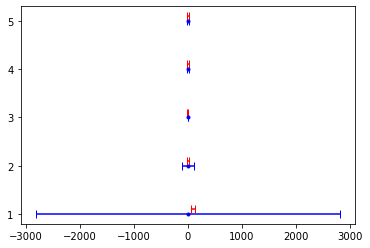

In [24]:
s1 = fit_and_plot(123, ax=None, covs=covs)


In [25]:
lgb_res = fit_mlss(123, trainer=train_lgb)

In [26]:
pd.DataFrame(lgb_res)



ValueError: All arrays must be of the same length

In [ ]:
type(lgb_res)

In [ ]:
lgb_res["coef"]

In [ ]:
res = lgb_res

In [ ]:
coef, wald_se = pd.DataFrame(res["coef"]).iloc[1, :2]

numbers, shape = parse_ar(res["ar1"])

In [ ]:
numbers

In [ ]:
shape

In [ ]:
covs

In [ ]:
pd.DataFrame(tsls)

In [ ]:
tsls

In [ ]:
print(pd.DataFrame(tsls).T.iloc[:2, 1])

In [ ]:


        
        s1 = fit_and_plot(123, ax=None, covs=covs)
        s2 = fit_and_plot(321, ax=None, covs=covs)
        s3 = fit_and_plot(42, ax=None, covs=covs)
        
        if (ar_tsls != "Empty Set" and ar_tsls2 != "Empty Set"):
            
        
            # plot 2 - 

            f, axs = plt.subplots(ncols=3, figsize=(10, 4), sharey=True, sharex=True)

            fit_and_plot(123, ax=axs[0], precompute=s1, covs=covs)
            fit_and_plot(321, ax=axs[1], precompute=s2, covs=covs)
            fit_and_plot(42, ax=axs[2], precompute=s3, covs=covs)
            
            est, wald = tsls.iloc[1, :2]
            lb, ub = parse_ar(ar_tsls)[0]
            lb = max(lb, -1000)
            ub = min(ub, 1000)

            axs[0].errorbar(
                y=7, x=est, xerr=1.96 * wald, marker=".", **plot_kwargs, color="b", label="Wald"
            )
            axs[0].errorbar(
                y=7 + 0.1,
                x=est,
                xerr=np.array([[est - lb], [ub - est]]),
                **plot_kwargs,
                color="r",
                label="Anderson-Rubin",
            )
            
            est, wald = tsls_quad.iloc[1, :2]
            axs[0].errorbar(y=6, x=est, xerr=1.96 * wald, marker=".", **plot_kwargs, color="b")

            try:
                lb, ub = parse_ar(ar_quad)[0]
                lb = max(lb, -1000)
                ub = min(ub, 1000)
                axs[0].errorbar(
                    y=6 + 0.1,
                    x=est,
                    xerr=np.array([[est - lb], [ub - est]]),
                    **plot_kwargs,
                    color="r",
                )
            except:
                pass
            
##### Judge Identity - 

            est, wald = tsls2.iloc[1, :2]
            lb, ub = parse_ar(ar_tsls2)[0]
            lb = max(lb, -1000)
            ub = min(ub, 1000)

            axs[0].errorbar(
                y=8, x=est, xerr=1.96 * wald, marker=".", **plot_kwargs, color="g", label="Wald (Judge Identity)"
            )
            axs[0].errorbar(
                y=8 + 0.1,
                x=est,
                xerr=np.array([[est - lb], [ub - est]]),
                **plot_kwargs,
                color="y",
                label="Anderson-Rubin (Judge Identity)",
            )

#####

            plt.yticks(
                ticks=list(range(1, 9)),
                labels=[
                    "Saturated Quadratic",
                    "Quadratic",
                    "Linear",
                    "Random Forest",
                    "LightGBM",
                    "TSLS (Quadratic)",
                    "TSLS",
                    "TSLS (Judge Identity)"
                ],
            )

            for i in [0, 1, 2]:
                axs[i].axvline(0, color="k", ls="--")

            axs[1].set_xlabel(f"Estimated {outcomevar} (Yearly) (with covariates) ({tmvect})")

            axs[0].legend(loc=(3.7, 0), frameon=False)
            plt.xlim((-meanoutcome-stdoutcome), (meanoutcome+stdoutcome))
            fig_name = str(outcomevar) + "_" + str(tmvect) + "_with_cov.pdf"

            savepath = os.path.join(r"C:\Users\wb570559\mlss_replication\air_pollution\results", fig_name)
            plt.savefig(savepath, bbox_inches="tight")

In [ ]:
tsls.head()


In [ ]:
tsls.describe()

In [ ]:
import PyPDF2
from PyPDF2 import PdfFileMerger, PdfFileReader
import glob
import os

In [ ]:
paths = glob.glob(r"C:\Users\wb570559\mlss_replication\air_pollution\results\*.pdf")

In [ ]:
paths.sort()

In [ ]:
paths

In [ ]:
# Call the PdfFileMerger
mergedObject = PdfFileMerger()
 
# I had 116 files in the folder that had to be merged into a single document
# Loop through all of them and append their pages
for fileName in paths:
    mergedObject.append(PdfFileReader(fileName, 'rb'))
 
 # Write all the files into a file which is named as shown below
mergedObject.write("mergedfilesoutput_final_pollution.pdf")

In [ ]:
#!pip install --user pandas --upgrade

In [ ]:
df2.head()